In [ ]:
import numpy as np

# FEATURE CONSTRUCTION

In [ ]:
import pandas as pd
room_length = [18,20,10,12,18,11]
room_breadth = [20,20,10,11,19,10]
room_type = ['Big','Big','Normal','Normal','Big','Normal']

In [ ]:
data = pd.DataFrame({'Length': room_length,'Breadth': room_breadth,'Type': room_type})

In [ ]:
data

,Length,Breadth,Type
0,18,20,Big
1,20,20,Big
2,10,10,Normal
3,12,11,Normal
4,18,19,Big
5,11,10,Normal


In [ ]:
data.shape

(6, 3)

In [ ]:
data.columns

Index(['Length', 'Breadth', 'Type'], dtype='object')

In [ ]:
data.describe

<bound method NDFrame.describe of    Length  Breadth    Type
0      18       20     Big
1      20       20     Big
2      10       10  Normal
3      12       11  Normal
4      18       19     Big
5      11       10  Normal>

In [ ]:
data['Type']

0       Big
1       Big
2    Normal
3    Normal
4       Big
5    Normal
Name: Type, dtype: object

In [ ]:
data['Area'] = data['Length'] * data['Breadth']

In [ ]:
data

,Length,Breadth,Type,Area
0,18,20,Big,360
1,20,20,Big,400
2,10,10,Normal,100
3,12,11,Normal,132
4,18,19,Big,342
5,11,10,Normal,110


In [ ]:
data.columns

Index(['Length', 'Breadth', 'Type', 'Area'], dtype='object')

# Dummy coding categorical (nominal) variables:
# get_dummies function of pandas library can be used as dummy code categorical variables.

# FEATURE TRANSFORMATION

In [ ]:
import pandas as pd
age = [18,20,23,19,18,22]
city=['City A','City B','City B','City A','City C','City B']
data = pd.DataFrame({'Age': age,'city': city})
data

,Age,city
0,18,City A
1,20,City B
2,23,City B
3,19,City A
4,18,City C
5,22,City B


In [ ]:
help(pd.get_dummies)

Help on function get_dummies in module pandas.core.reshape.reshape:

get_dummies(data, prefix=None, prefix_sep='_', dummy_na: 'bool' = False, columns=None, sparse: 'bool' = False, drop_first: 'bool' = False, dtype: 'Dtype | None' = None) -> 'DataFrame'
    Convert categorical variable into dummy/indicator variables.
    
    Parameters
    ----------
    data : array-like, Series, or DataFrame
        Data of which to get dummy indicators.
    prefix : str, list of str, or dict of str, default None
        String to append DataFrame column names.
        Pass a list with length equal to the number of columns
        when calling get_dummies on a DataFrame. Alternatively, `prefix`
        can be a dictionary mapping column names to prefixes.
    prefix_sep : str, default '_'
        If appending prefix, separator/delimiter to use. Or pass a
        list or dictionary as with `prefix`.
    dummy_na : bool, default False
        Add a column to indicate NaNs, if False NaNs are ignored.
  

In [ ]:
dummy_features = pd.get_dummies(data['city'])
dummy_features

,City A,City B,City C
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,0,1
5,0,1,0


In [ ]:
data_age = pd.DataFrame(data = data,columns = ['Age'])
data_age

,Age
0,18
1,20
2,23
3,19
4,18
5,22


In [ ]:
data_mod = pd.concat([data_age.reset_index(drop= True),dummy_features],axis=1)
data_mod

,Age,City A,City B,City C
0,18,1,0,0
1,20,0,1,0
2,23,0,1,0
3,19,1,0,0
4,18,0,0,1
5,22,0,1,0


In [ ]:
data_mod.columns

Index(['Age', 'City A', 'City B', 'City C'], dtype='object')

# Encoding categorical (ordinal) variables: LabelEncoder is function of sklearn.Preprocessing library can be used to encode categorical variables

In [ ]:
import pandas as pd
from sklearn import preprocessing
marks_science = [78,56,87,91,45,62]
marks_maths = [75,62,90,95,42,57]
grade = ['B','C','A','A','D','B']
data = pd.DataFrame({'Science marks': marks_science, 'Maths marks': marks_maths, 'Total grade': grade})

In [ ]:
data

,Science marks,Maths marks,Total grade
0,78,75,B
1,56,62,C
2,87,90,A
3,91,95,A
4,45,42,D
5,62,57,B


#Option 1

In [ ]:
import sklearn

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(data['Total grade'])
data['Total grade'] = le.transform(data['Total grade'])

In [ ]:
data['Total grade']

0    1
1    2
2    0
3    0
4    3
5    1
Name: Total grade, dtype: int64

#Option 2

In [ ]:
target = data['Total grade'].replace(['A','B','C','D'],[0,1,2,3])

In [ ]:
predictors = data.iloc[:,0:2]
data_mod = pd.concat([predictors.reset_index(drop=True),target],axis=1)

In [ ]:
data_mod

,Science marks,Maths marks,Total grade
0,78,75,1
1,56,62,2
2,87,90,0
3,91,95,0
4,45,42,3
5,62,57,1


# Transforming numeric (continuous) features to categorical feautures:

In [ ]:
import pandas as pd
import numpy as np
apartment_area = [4720,2430,4368,3969,6142,7912]
apartment_price = [2360000,1215000,2184000,1984500,3071000,3956000]
data = pd.DataFrame({'Area': apartment_area, 'Price': apartment_price})

In [ ]:
data

,Area,Price
0,4720,2360000
1,2430,1215000
2,4368,2184000
3,3969,1984500
4,6142,3071000
5,7912,3956000


In [ ]:
data['Price'] = np.where(data['Price']>3000000,'High',np.where(data['Price']<2000000,'Low','Medium' ))

In [ ]:
data

,Area,Price
0,4720,Medium
1,2430,Low
2,4368,Medium
3,3969,Low
4,6142,High
5,7912,High


# FEATURE SELECTION

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
iris = datasets.load_iris()
predictors = iris.data[:,0:4]

In [ ]:
help(sklearn.preprocessing.StandardScaler)

Help on class StandardScaler in module sklearn.preprocessing._data:

class StandardScaler(sklearn.base._OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  StandardScaler(*, copy=True, with_mean=True, with_std=True)
 |  
 |  Standardize features by removing the mean and scaling to unit variance.
 |  
 |  The standard score of a sample `x` is calculated as:
 |  
 |      z = (x - u) / s
 |  
 |  where `u` is the mean of the training samples or zero if `with_mean=False`,
 |  and `s` is the standard deviation of the training samples or one if
 |  `with_std=False`.
 |  
 |  Centering and scaling happen independently on each feature by computing
 |  the relevant statistics on the samples in the training set. Mean and
 |  standard deviation are then stored to be used on later data using
 |  :meth:`transform`.
 |  
 |  Standardization of a dataset is a common requirement for many
 |  machine learning estimators: they might behave badly if the
 |  individual fea

In [ ]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
predictors

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
target = iris.target
predictors= StandardScaler().fit_transform(predictors)
predictors

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [ ]:
pca = PCA(n_components=2)
princomp = pca.fit_transform(predictors)
princomp_ds = pd.DataFrame(data = princomp, columns= ['PC 1','PC 2'])

In [ ]:
princomp

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

In [ ]:
princomp_ds

,PC 1,PC 2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835
...,...,...
145,1.870503,0.386966
146,1.564580,-0.896687
147,1.521170,0.269069
148,1.372788,1.011254


In [ ]:
target_ds = pd.DataFrame(data = target,columns=['class'])
target_ds

,class
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


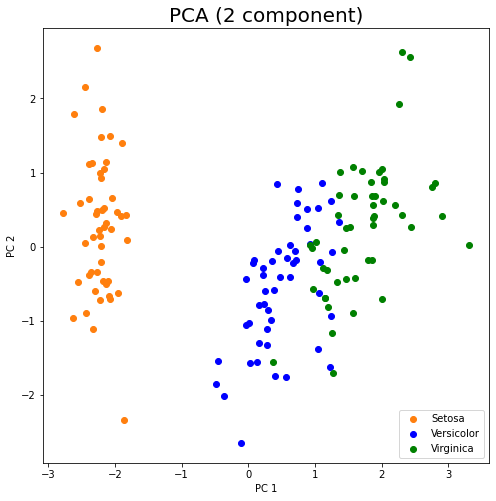

In [ ]:
data_mod = pd.concat([princomp_ds.reset_index(drop=True),target_ds],axis=1)
fig = plt.figure(figsize=(8,8))
pca_plot = fig.add_subplot(1,1,1)
pca_plot.set_xlabel('PC 1')
pca_plot.set_ylabel('PC 2')
pca_plot.set_title('PCA (2 component)',fontsize = 20)
classes = [0,1,2]
colors = ['tab:orange','b','g']
for target, color in zip(classes,colors):
  indices = data_mod['class'] == target
  pca_plot.scatter(data_mod.loc[indices,'PC 1'], data_mod.loc[indices,'PC 2'],color=color)
  legends = ['Setosa','Versicolor','Virginica']
  pca_plot.legend(legends)

In [ ]:
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = pd.read_csv("apndcts.csv")
predictors = data.iloc[:,0:7]
target = data.iloc[:,7]
test = SelectKBest(chi2,k=2)
fit = test.fit(predictors,target)
features = fit.transform(predictors)
print(predictors.columns)

Index(['At1', ' At2', ' At3', ' At4', ' At5', ' At6', ' At7'], dtype='object')


In [ ]:
features

In [ ]:
np.set_printoptions(precision=3)
print(fit.scores_)

[1.771 1.627 2.391 1.084 1.673 1.647 2.236]
